In [2]:
# Data manipulation and preprocessing
import pandas as pd
import numpy as np

# Machine learning algorithms and utilities
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc, roc_curve
from sklearn.metrics import f1_score


# Handling imbalanced data
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTEENN

# Autoencoder and Neural Networks (for deep learning models)
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Tree-based models (for alternative machine learning algorithms)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


# Regularization and performance tuning
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier

# Plotting and visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data augmentation (if needed for advanced techniques)
from keras.layers import GaussianNoise
from imblearn.under_sampling import RandomUnderSampler


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [3]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/creditcard.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Check for missing values

In [5]:
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


**Fit a gradient boost to analyze feature importance**




In [ ]:
# Define df with principal components and a predictor variable
X = df.drop('Class', axis=1)
y = df['Class']


In [ ]:
# Check the range of features
print(X.describe())

                 V1            V2            V3            V4            V5  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15  9.604066e-16   
std    1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00  1.380247e+00   
min   -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00 -1.137433e+02   
25%   -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01 -6.915971e-01   
50%    1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02 -5.433583e-02   
75%    1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01  6.119264e-01   
max    2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01  3.480167e+01   

                 V6            V7            V8            V9           V10  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15  2.239053e-15   
std    1.332271e+00  1.237094e+00  1.194353e+00  1.

    Index  Eigenvalue  Explained Variance Ratio
0       0  217.204464                  0.681126
1       1   31.853925                  0.099890
2       2   23.655033                  0.074179
4       4   11.710011                  0.036721
3       3   10.237754                  0.032104
5       5    3.431546                  0.010761
6       6    2.455446                  0.007700
7       7    2.198356                  0.006894
8       8    1.915935                  0.006008
9       9    1.748307                  0.005482
10     10    1.445914                  0.004534
11     11    1.308264                  0.004103
12     12    1.239650                  0.003887
15     15    1.067574                  0.003348
24     24    0.967852                  0.003035
25     25    0.916237                  0.002873
27     27    0.868964                  0.002725
26     26    0.854470                  0.002680
23     23    0.670420                  0.002102
22     22    0.569802                  0

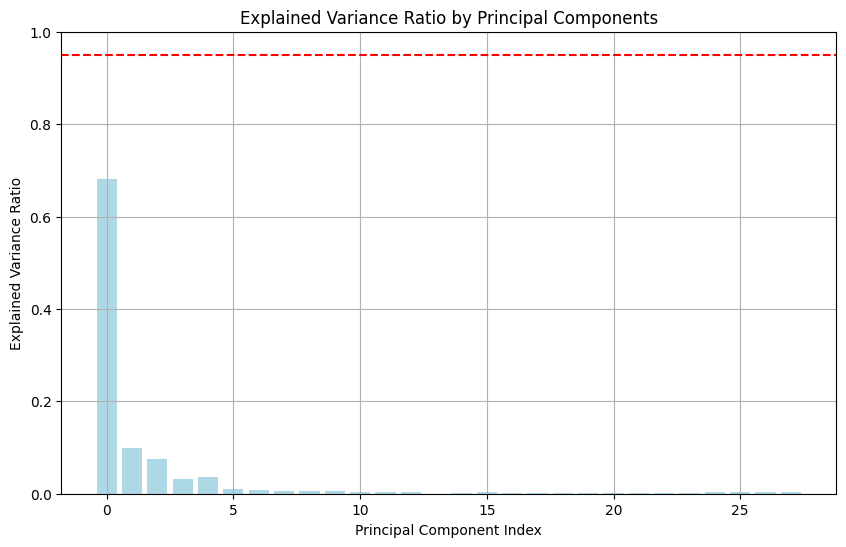

In [ ]:
# Step 1: Calculate the covariance matrix of the principal components
under_sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_balanced, y = under_sampler.fit_resample(X, y)

cov_matrix = np.cov(X_balanced, rowvar=False)

# Step 2: Perform eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 3: Create a DataFrame to maintain order
# Pair the eigenvalues with their indices
eigenvalue_df = pd.DataFrame({
    'Index': np.arange(28),  # Indices from 0 to 27
    'Eigenvalue': eigenvalues
})

# Step 4: Sort by eigenvalue in descending order while maintaining the original index
eigenvalue_df = eigenvalue_df.sort_values(by='Eigenvalue', ascending=False)

# Step 5: Calculate explained variance ratio
eigenvalue_df['Explained Variance Ratio'] = eigenvalue_df['Eigenvalue'] / np.sum(eigenvalue_df['Eigenvalue'])

# Display the results with original order
print(eigenvalue_df)

# Optional: You can reset the index if you want to start from 0
eigenvalue_df.reset_index(drop=True, inplace=True)

# Plot explained variance for visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(eigenvalue_df['Index'], eigenvalue_df['Explained Variance Ratio'], color='lightblue')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.ylim(0, 1)
plt.axhline(y=0.95, color='r', linestyle='--')  # Example threshold at 95%
plt.grid()
plt.show()


Analyze the correlation matrix to find relationships between features, helping to identify patterns that distinguish fraudulent from non-fraudulent transactions. This can improve fraud detection by revealing important or redundant features.



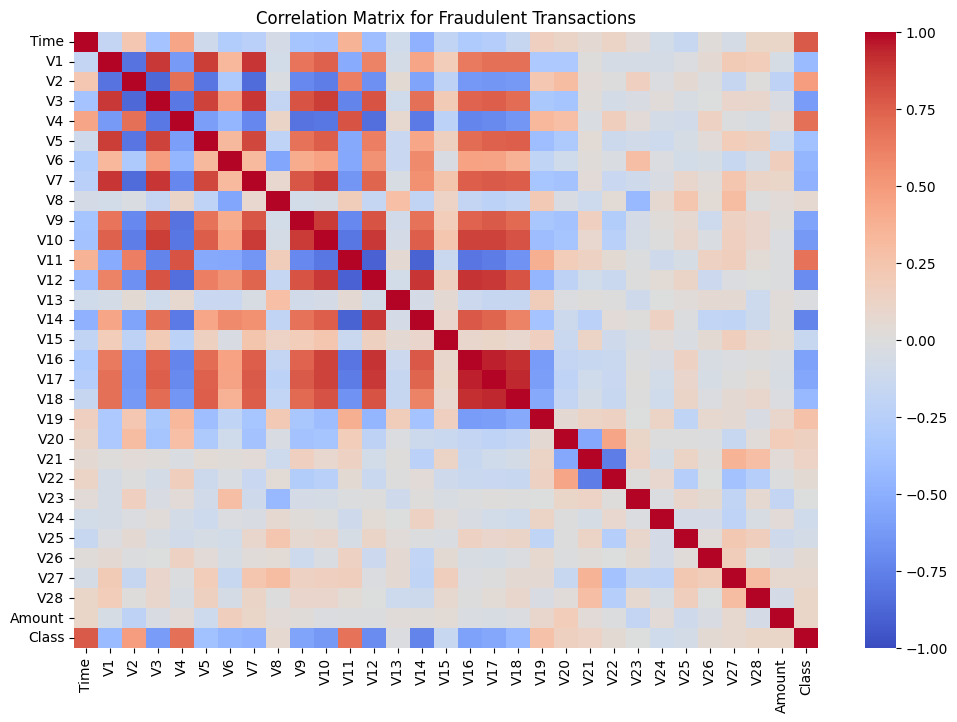

In [ ]:
df_fraud = df.loc[df['Class'] == 1]

# Create a DataFrame with only Class 0 (non-fraudulent transactions)
df_non_fraud = df.loc[df['Class'] == 0][:492]

balanced_df = pd.concat([df_fraud, df_non_fraud])


corr_matrix = balanced_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Fraudulent Transactions')
plt.show()


From heatmap it is observed that features V2, V4 and V11 are positively correlated with Class variable.
V3, V9, V10, V12, V14 are negatively correlated.

It's important to try to reduce noise in these features. Use autoencoder to exclude outliers.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

def filter_outliers_autoencoder(X_train, y_train, selected_features, outlier_threshold=95, epochs=50, batch_size=32):
    """
    Filters outliers from the training set using an autoencoder based on reconstruction error.

    Parameters:
    - X_train: Training feature set (DataFrame or NumPy array)
    - y_train: Training target labels
    - selected_features: List of selected feature columns to use for the autoencoder
    - outlier_threshold: Percentile to determine the threshold for outliers (default is 95, meaning top 5% are outliers)
    - epochs: Number of epochs to train the autoencoder
    - batch_size: Batch size for autoencoder training

    Returns:
    - X_train_filtered: Training feature set with outliers removed
    - y_train_filtered: Corresponding target labels for the filtered dataset
    """

    # Normalize the selected features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_train[selected_features])

    # Split the data into training and validation sets
    X_train_auto, X_test_auto = train_test_split(X_scaled, test_size=0.2, random_state=42)

    # Build the autoencoder model
    autoencoder = Sequential([
        Dense(8, activation='relu', input_shape=(X_train_auto.shape[1],)),
        Dense(4, activation='relu'),
        Dense(8, activation='relu'),
        Dense(X_train_auto.shape[1], activation='linear')
    ])

    # Compile the model
    autoencoder.compile(optimizer='adam', loss='mse')

    # Train the autoencoder
    autoencoder.fit(X_train_auto, X_train_auto, epochs=epochs, batch_size=batch_size, validation_data=(X_test_auto, X_test_auto), verbose=0)

    # Get the reconstruction errors for the entire X_train dataset
    X_pred = autoencoder.predict(X_scaled)
    reconstruction_error = np.mean(np.abs(X_pred - X_scaled), axis=1)

    # Define the threshold for outliers (e.g., top 5% with the highest reconstruction error)
    threshold = np.percentile(reconstruction_error, outlier_threshold)

    # Identify non-outliers (those below the threshold)
    non_outliers = reconstruction_error < threshold

    # Filter the original X_train and y_train to remove outliers
    X_train_filtered = X_train[non_outliers]
    y_train_filtered = y_train[non_outliers]

    return X_train_filtered, y_train_filtered


In [ ]:
# Calculate the standard deviation of the features
std_dev = X.std().mean()  # Average standard deviation across features

# Choose a noise factor
noise_factor = 0.01 * std_dev  # 1% of the average standard deviation
noise_factor


0.00976391424298722

In [ ]:
# Undersample
from sklearn.utils import shuffle

def undersample(X, y, desired_samples_class_0):
    class_0 = X[y == 0]
    class_1 = X[y == 1]

    # Randomly undersample the majority class
    class_0_undersampled = class_0.sample(n=desired_samples_class_0, random_state=42)

    # Combine the classes
    X_balanced = pd.concat([class_0_undersampled, class_1])
    y_balanced = pd.concat([pd.Series([0] * desired_samples_class_0), pd.Series([1] * len(class_1))])

    # Shuffle the dataset
    X_balanced, y_balanced = shuffle(X_balanced, y_balanced, random_state=42)

    return X_balanced, y_balanced


In [ ]:
# Function for oversampling
def oversample(X, y, target_minority_samples):
    ros = RandomOverSampler(sampling_strategy={1: target_minority_samples}, random_state=42)
    X_ros, y_ros = ros.fit_resample(X, y)
    return X_ros, y_ros


In [ ]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix - {title}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Select the features to include in the autoencoder
selected_features = ['V2', 'V4', 'V11', 'V3', 'V9', 'V10', 'V12', 'V14']

# Fit and resample the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train, y_train = filter_outliers_autoencoder(X_train, y_train, selected_features)

X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Store models for comparison
classifiers = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=500, random_state=42),
    'Random Forest': RandomForestClassifier(class_weight={0: 1, 1: 5}, n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(probability=True, class_weight='balanced', random_state=42),
    'LightGBM': LGBMClassifier(
    class_weight={0: 1, 1: 3},  # Adjusting class weights for imbalance
    colsample_bytree=0.71,       # Using 80% of features for each tree
    learning_rate=0.14,          # Learning rate
    max_depth=7,
    min_child_samples=10,  # Maximum depth of trees
    min_child_weight=1,         # Minimum child weight
    n_estimators=100,           # Number of trees
    subsample=0.8,              # Using 80% of data for training each tree
    random_state=42,
    verbose = -1 # For reproducibility
)
}

# Scaling (for models like Logistic Regression, SVM, and KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Fit models and evaluate
for name, model in classifiers.items():
    if name in ['Logistic Regression', 'KNN', 'SVM']:
        model.fit(X_train_scaled, y_train_resampled)
        y_pred = model.predict(X_test_scaled)
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train_resampled, y_train_resampled)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

    # Evaluation
    print(f'\nModel: {name}')
    print(classification_report(y_test, y_pred))

    # ROC AUC Score
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f'ROC AUC Score: {roc_auc:.4f}')

    print(confusion_matrix(y_test, y_pred))

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7121/7121 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step

Model: Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     56864
           1       0.02      0.92      0.03        98

    accuracy                           0.90     56962
   macro avg       0.51      0.91      0.49     56962
weighted avg       1.00      0.90      0.95     56962

ROC AUC Score: 0.9635
[[51312  5552]
 [    8    90]]

Model: Random Forest
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.91      0.09        98

    accuracy                           0.97     56962
   macro avg       0.52      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962

ROC AUC Score: 0.9837
[[55097  1767]
 [    9    89]]

Model: KNN
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56864
           1       0.03  

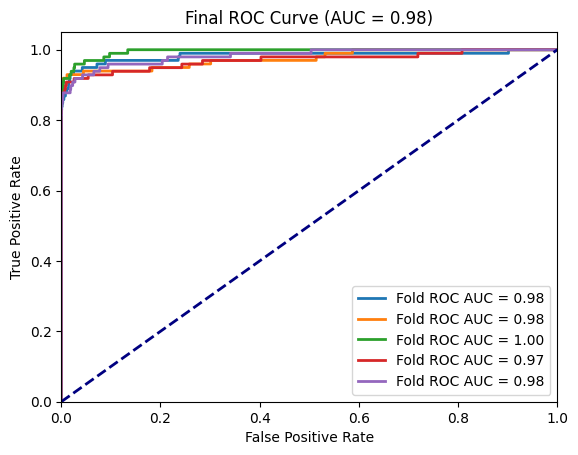

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.62      0.86      0.72       492

    accuracy                           1.00    284807
   macro avg       0.81      0.93      0.86    284807
weighted avg       1.00      1.00      1.00    284807

Confusion Matrix on Test Set:
[[284056    259]
 [    70    422]]


In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# To store results
all_predictions = []
all_y_true = []
all_y_proba = []  # Store predicted probabilities for ROC AUC
mean_fpr = np.linspace(0, 1, 100)  # Interpolation points for FPR

desired_samples_class_0 = 15000  # Set desired number of majority samples
target_minority_samples = 4500    # Set target number of minority samples


for train_index, test_index in cv.split(X, y):
    # Split into train and test sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

     # Undersample the training data
    X_balanced, y_balanced = undersample(X_train, y_train, desired_samples_class_0)

    # Oversample the minority class
    X_ros, y_ros = oversample(X_balanced, y_balanced, target_minority_samples)

    # Apply SMOTE to the training set only
    smoteenn = SMOTEENN(random_state=42)
    smote = SMOTE(random_state=42)
    adasyn = ADASYN(random_state=42)
    X_smote, y_smote = smote.fit_resample(X_ros, y_ros)

    # Initialize the model inside the loop to ensure fresh model per fold
    model = LGBMClassifier(
    class_weight={0: 1, 1: 1},  # Adjusting class weights for imbalance
    colsample_bytree=0.71,       # Using 80% of features for each tree
    learning_rate=0.14,          # Learning rate
    max_depth=7,
    min_child_samples=10,  # Maximum depth of trees
    min_child_weight=1,         # Minimum child weight
    n_estimators=100,           # Number of trees
    subsample=0.8,              # Using 80% of data for training each tree
    random_state=42,
    verbose = -1# For reproducibility
)

    # Train the LightGBM model on the balanced training data
    model.fit(X_smote, y_smote)

    # Predict on the original testing set
    y_pred_test = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:,1]

    # Store predictions and true values for later evaluation
    all_predictions.extend(y_pred_test)  # Collect predictions
    all_y_true.extend(y_test)  # Collect true values
    all_y_proba.extend(y_pred_proba)

    # Calculate ROC curve for this fold
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve for each fold
    plt.plot(fpr, tpr, lw=2, label=f'Fold ROC AUC = {roc_auc:.2f}')

# Final ROC AUC Calculation
fpr, tpr, _ = roc_curve(all_y_true, all_y_proba)
roc_auc = auc(fpr, tpr)

# Plot final ROC curve
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Final ROC Curve (AUC = {roc_auc:.2f})')
plt.legend(loc="lower right")
plt.show()


# Evaluate the overall model's performance on all test sets
print("Classification Report on Test Set:")
print(classification_report(all_y_true, all_predictions))

print("Confusion Matrix on Test Set:")
print(confusion_matrix(all_y_true, all_predictions))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7121/7121 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step

LightGBM Model:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     56864
           1       0.02      0.94      0.03        98

    accuracy                           0.90     56962
   macro avg       0.51      0.92      0.49     56962
weighted avg       1.00      0.90      0.95     56962

Confusion Matrix:
[[51397  5467]
 [    6    92]]

LightGBM Model (with threshold = 0.97):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.90      0.13        98

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.56     56962
weighted avg       1.00      0.98      0.99     56962

Confusion Matrix (with custom threshold):
[[55674  1190]
 [   10    88]]
ROC AUC Score: 0.9773


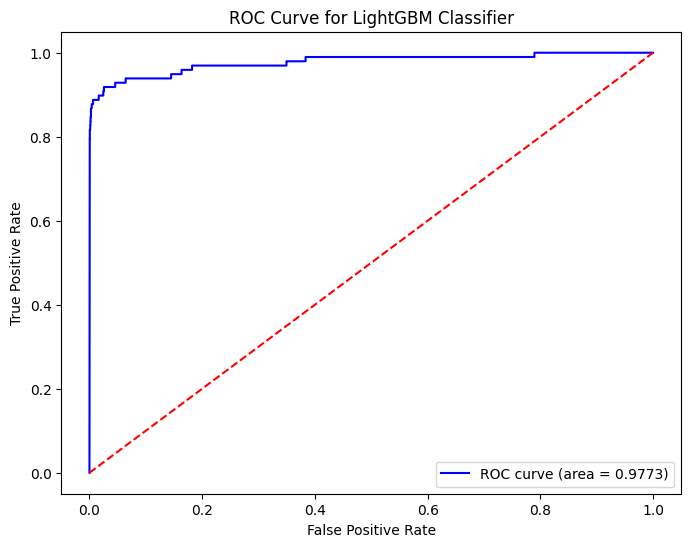

In [ ]:
selected_features = ['V2', 'V4', 'V11', 'V3', 'V9', 'V10', 'V12', 'V14']

# Apply Random Undersampling
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42, stratify=y)

# Filter outliers using the autoencoder function (assuming you have this function defined)
X_train, y_train = filter_outliers_autoencoder(X_train, y_train, selected_features)

# Apply undersampling on the training set
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# LightGBM Classifier
lgbm_model = LGBMClassifier(
    class_weight={0: 1, 1: 3},  # Adjusting class weights for imbalance
    colsample_bytree=0.71,       # Using 80% of features for each tree
    learning_rate=0.14,          # Learning rate
    max_depth=7,                 # Maximum depth of trees
    min_child_samples=10,        # Minimum samples required in a leaf node
    min_child_weight=1,          # Minimum sum of instance weight (hessian) in a child
    n_estimators=100,            # Number of trees
    subsample=0.8,               # Using 80% of data for training each tree
    random_state=42,
    verbose=-1                   # For reproducibility
)

# Fit the model
lgbm_model.fit(X_train_resampled, y_train_resampled)

# Predictions and probabilities
y_pred = lgbm_model.predict(X_test)
y_proba = lgbm_model.predict_proba(X_test)[:, 1]

# Evaluation
print('\nLightGBM Model:')
print(classification_report(y_test, y_pred))

# Confusion Matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Define a custom threshold for converting probabilities to class labels
threshold = 0.97  # Example: Set to 0.3 instead of the default 0.5

# Get predicted probabilities
y_proba = lgbm_model.predict_proba(X_test)[:, 1]

# Apply the custom threshold
y_pred_custom_threshold = (y_proba >= threshold).astype(int)

# Evaluation with custom threshold
print(f'\nLightGBM Model (with threshold = {threshold}):')
print(classification_report(y_test, y_pred_custom_threshold))

# Confusion Matrix with custom threshold
print('Confusion Matrix (with custom threshold):')
print(confusion_matrix(y_test, y_pred_custom_threshold))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print(f'ROC AUC Score: {roc_auc:.4f}')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LightGBM Classifier')
plt.legend()
plt.show()

In [ ]:
import time
# Tune parameters
selected_features = ['V2', 'V4', 'V11', 'V3', 'V9', 'V10', 'V12', 'V14']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train, y_train = filter_outliers_autoencoder(X_train, y_train, selected_features)

smote = SMOTE(random_state=42)

X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

model = LGBMClassifier(
    class_weight={0: 1, 1: 5},  # Adjusting class weights for imbalance
    colsample_bytree=0.8,       # Using 80% of features for each tree
    learning_rate=0.15,          # Learning rate
    max_depth=7,                # Maximum depth of trees
    min_child_weight=1,         # Minimum child weight
    n_estimators=200,           # Number of trees
    subsample=0.8,              # Using 80% of data for training each tree
    random_state=42 ,
    verbose = -1# For reproducibility
)
model.fit(X_train_balanced, y_train_balanced)

y_pred = model.predict(X_test)

print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix on Test Set:")
print(confusion_matrix(y_test, y_pred))

# Get probabilities instead of hard predictions
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Adjust the decision threshold to tune precision/recall trade-off
threshold = 0.3 # Experiment with different values
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

print("Adjusted Classification Report on Test Set:")
print(classification_report(y_test, y_pred_adjusted))
print("Adjusted Confusion Matrix on Test Set:")
print(confusion_matrix(y_test, y_pred_adjusted))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7121/7121 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.72      0.84      0.77        98

    accuracy                           1.00     56962
   macro avg       0.86      0.92      0.89     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix on Test Set:
[[56832    32]
 [   16    82]]
Adjusted Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.68      0.84      0.75        98

    accuracy                           1.00     56962
   macro avg       0.84      0.92      0.88     56962
weighted avg       1.00      1.00      1.00     56962

Adjusted Confusion Matrix on Test Set:
[[56826    38]
 [   16    82]]


In [ ]:
# Tuning parameters with CV
selected_features = ['V2', 'V4', 'V11', 'V3', 'V9', 'V10', 'V12', 'V14']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, y_train = filter_outliers_autoencoder(X_train, y_train, selected_features)

X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

model = LGBMClassifier(random_state=42, verbose=-1)

param_grid = {
    'class_weight': [{0: 1, 1: w} for w in [5, 10]],  # Fewer class weight options
    'n_estimators': [100, 200, 300],  # Keep to 100 trees
    'learning_rate': [0.1, 0.15],  # A single learning rate
    'max_depth': [None, 5, 7],  # Fewer depth options
    'min_child_weight': [1],  # Single option
    'subsample': [0.8],  # Single option
    'colsample_bytree': [0.8]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='recall', cv=5, n_jobs=-1, verbose=1)

grid_search.fit(X_train_balanced, y_train_balanced)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best F1 Score: {grid_search.best_score_:.4f}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7121/7121 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'class_weight': {0: 1, 1: 5}, 'colsample_bytree': 0.8, 'learning_rate': 0.15, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
Best F1 Score: 0.9999


Now implementing autoencoder for anomaly detection on non-fraudulent class.

In [ ]:
from sklearn.ensemble import IsolationForest

# Step 1: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Step 3: Scale the features
scaler = StandardScaler()
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)

# Step 4: Define and train the autoencoder on the balanced training set
input_dim = X_train_balanced_scaled.shape[1]  # Number of features

# Define the architecture of the autoencoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dropout(0.2)(encoded)  # Regularization
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Fit the autoencoder on the balanced training data
autoencoder.fit(X_train_balanced_scaled, X_train_balanced_scaled, epochs=50, batch_size=256, shuffle=True, validation_split=0.2)

# Step 5: Scale the entire dataset (including the test set)
X_scaled = scaler.transform(X)

# Step 6: Reconstruct data and calculate reconstruction error
reconstructed = autoencoder.predict(X_scaled)
mse = np.mean(np.power(X_scaled - reconstructed, 2), axis=1)

# Step 7: Define a more stringent threshold for anomalies (e.g., 90th percentile)
threshold = np.percentile(mse, 99)  # Adjusted threshold

# Step 8: Identify anomalies based on the reconstruction error
anomalies = mse > threshold

# Step 9: Count how many detected anomalies are from class 1
num_anomalies_from_class_1 = np.sum(anomalies & (y == 1))

# Step 10: Use Isolation Forest for anomaly detection
isolation_forest = IsolationForest(contamination=0.01, random_state=42)
isolation_forest.fit(X_scaled)

# Predict anomalies using Isolation Forest
isolation_anomalies = isolation_forest.predict(X_scaled)  # -1 for anomalies, 1 for normal

# Combine predictions
combined_anomalies = anomalies | (isolation_anomalies == -1)

# Count how many anomalies from class 1 using combined method
num_combined_anomalies_from_class_1 = np.sum(combined_anomalies & (y == 1))

print(f"Number of anomalies detected: {np.sum(combined_anomalies)}")
print(f"Number of anomalies from class 1: {num_combined_anomalies_from_class_1}")
print(f"Number of anomalies from class 0: {np.sum(combined_anomalies) - num_combined_anomalies_from_class_1}")

# Optional: Print the actual anomaly data
anomaly_df = pd.DataFrame(X[combined_anomalies])
anomaly_df['target'] = y[combined_anomalies].values  # Add target variable for reference
print(anomaly_df)

Epoch 1/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.7150 - val_loss: 1.0783
Epoch 2/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.6101 - val_loss: 1.0719
Epoch 3/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.6071 - val_loss: 1.0705
Epoch 4/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.6080 - val_loss: 1.0699
Epoch 5/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.6019 - val_loss: 1.0692
Epoch 6/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.5972 - val_loss: 1.0688
Epoch 7/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.6024 - val_loss: 1.0683
Epoch 8/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.6022 - val_loss: 1.0684
Epoch 9/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.5994 - val_loss: 1.0683
Epoch 10/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.5965 - val_loss: 1.0677
Epoch 11/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.5980 - val_loss: 1.0675
Epoch 12/50
1422/1422 ━━━━━━━━

In [ ]:
num_anomalies_from_class_1 = np.sum(anomalies & (y == 1))
num_anomalies_from_class_0 = np.sum(anomalies & (y == 0))

print(f"Number of anomalies detected: {np.sum(anomalies)}")
print(f"Number of anomalies from class 1: {num_anomalies_from_class_1}")
print(f"Number of anomalies from class 0: {num_anomalies_from_class_0}")

# Optional: Print the actual anomaly data
anomaly_df = pd.DataFrame(X[anomalies])

Number of anomalies detected: 28481
Number of anomalies from class 1: 265
Number of anomalies from class 0: 28216
